In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
yelp=pd.read_csv('yelp.csv')

In [5]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [64]:
yelp['type'].unique()
yelp=yelp.drop('type',axis=1)
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   user_id      10000 non-null  object
 6   cool         10000 non-null  int64 
 7   useful       10000 non-null  int64 
 8   funny        10000 non-null  int64 
 9   length       10000 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 781.4+ KB


In [6]:
yelp['length']=yelp['text'].apply(len)

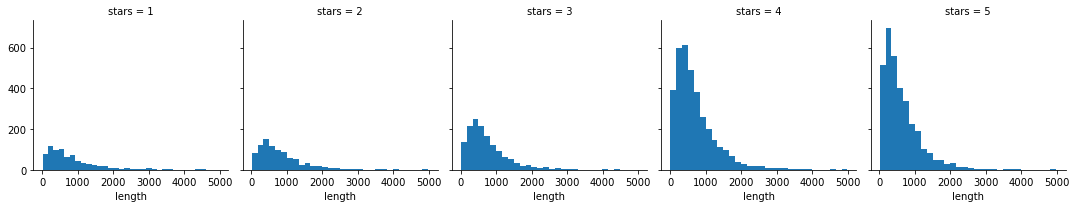

In [66]:
g=sns.FacetGrid(yelp,col='stars')
g.map(plt.hist,'length',bins=30)

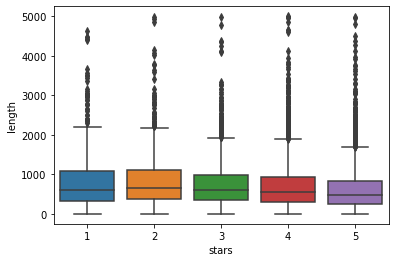

In [15]:
sns.boxplot(yelp,x='stars',y='length')

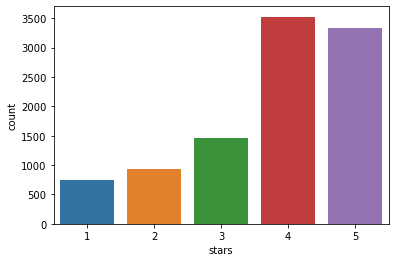

In [18]:
sns.countplot(yelp,x='stars')

In [7]:
stars=yelp.groupby('stars')[['cool','useful','funny','length']].mean()
stars

,cool,useful,funny,length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [28]:
stars.corr()

,cool,useful,funny,length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
length,-0.857664,0.699881,0.843461,1.000000


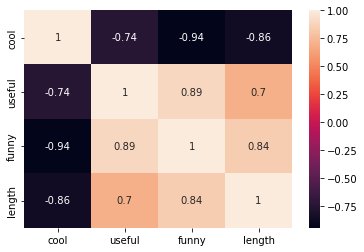

In [32]:
sns.heatmap(stars.corr(),annot=True)

In [8]:
yelp_class=yelp[(yelp['stars']==1) | (yelp['stars']==5)]

In [9]:
yelp_class.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4086 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  4086 non-null   object
 1   date         4086 non-null   object
 2   review_id    4086 non-null   object
 3   stars        4086 non-null   int64 
 4   text         4086 non-null   object
 5   type         4086 non-null   object
 6   user_id      4086 non-null   object
 7   cool         4086 non-null   int64 
 8   useful       4086 non-null   int64 
 9   funny        4086 non-null   int64 
 10  length       4086 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 383.1+ KB


In [10]:
X=yelp_class['text']
y=yelp_class['stars']

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [12]:
X=cv.fit_transform(X)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=101)

In [16]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [18]:
pred=nb.predict(X_test)

In [23]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))


              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



[[159  69]
 [ 22 976]]


In [26]:
#using text processing and pipline method
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
pipe=Pipeline([('bow',CountVectorizer()),('tfidf',TfidfTransformer()),('nb',MultinomialNB())])

In [29]:
X=yelp_class['text']
y=yelp_class['stars']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=101)
pipe.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('nb', MultinomialNB())])

In [31]:
pred2=pipe.predict(X_test)

In [33]:
print(classification_report(y_test,pred2))
print('\n')
print(confusion_matrix(y_test,pred2))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



[[  0 228]
 [  0 998]]


/home/ada/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ada/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ada/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
from sklearn.ensemble import RandomForestClassifier
pipe2=Pipeline([('bow',CountVectorizer()),('tfidf',TfidfTransformer()),('forest',RandomForestClassifier(n_estimators=4))])

In [62]:
X=yelp_class['text']
y=yelp_class['stars']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=101)
pipe2.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('forest', RandomForestClassifier(n_estimators=4))])

In [63]:
pred3=pipe2.predict(X_test)

In [64]:
print(classification_report(y_test,pred3))
print('\n')
print(confusion_matrix(y_test,pred3))

              precision    recall  f1-score   support

           1       0.58      0.60      0.59       228
           5       0.91      0.90      0.90       998

    accuracy                           0.84      1226
   macro avg       0.74      0.75      0.75      1226
weighted avg       0.85      0.84      0.85      1226



[[137  91]
 [100 898]]


In [ ]:
#so it turns out first predcition we made is best so far using tfidf or changing the classifier made things worse.